<a href="https://colab.research.google.com/github/lizavetashap/matstat/blob/main/Lab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Вариант 3

Условие: В файле cars 93.csv представлены данные об автомобилях, проданных в некотором автосалоне за 93 год. Какие типы автомобилей представлены в датасете? Какой тип наиболее распространен, какой - менее? Рассчитайте выборочное среднее, выборочную дисперсию, выборочную медиану и межквартильный размах мощности для всей совокупности автомобилей и отдельно для американских и не американских авто. Построить график эмпирической функции распределения, гистограмму и boxplot мощности для всей совокупности
и отдельно для каждого типа авто.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
cars = pd.read_csv('/content/cars93.csv') # подставить нужный файл

текст текст пробный текст

In [14]:
#from google.colab import files
#uploaded = files.upload()
print(cars)

   Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0         Acura  Integra    Small       12.9   15.9       18.8        25   
1         Acura   Legend  Midsize       29.2   33.9       38.7        18   
2          Audi       90  Compact       25.9   29.1       32.3        20   
3          Audi      100  Midsize       30.8   37.7       44.6        19   
4           BMW     535i  Midsize       23.7   30.0       36.2        22   
..          ...      ...      ...        ...    ...        ...       ...   
88   Volkswagen  Eurovan      Van       16.6   19.7       22.7        17   
89   Volkswagen   Passat  Compact       17.6   20.0       22.4        21   
90   Volkswagen  Corrado   Sporty       22.9   23.3       23.7        18   
91        Volvo      240  Compact       21.8   22.7       23.5        21   
92        Volvo      850  Midsize       24.8   26.7       28.5        20   

    MPG.highway             AirBags DriveTrain  ... Passengers  Length  \
0            

Вывод всех типов автомобилей, упомянутых в датасете.

In [59]:
unique_types = cars['Type'].unique()
print("Типы автомобилей в датасете:", ", ".join(unique_types))

Типы автомобилей в датасете: Small, Midsize, Compact, Large, Sporty, Van


Находим наиболее и наименее распространенный автомобиль:

In [19]:
type_counts = cars['Type'].value_counts() #расчет количества авто каждого типа

most_common_type = type_counts.idxmax()
least_common_type = type_counts.idxmin()
print("Самый распространенный тип авто:", most_common_type)
print("Самый менее распространенный тип авто:", least_common_type)

Самый распространенный тип авто: Midsize
Самый менее распространенный тип авто: Van


Расчет выборочного среднего, выборочной дисперсии, выборочной медианы и межквартильного размаха мощности:

In [47]:
def calculate_statistics(data):
    print("Выборочное среднее:", data.mean())
    print("Выборочная дисперсия:", data.var())
    print("Выборочная медиана:", data.median())
    btwqr = data.quantile(0.75) - data.quantile(0.25)
    print("Межквартальный размах:", btwqr)
    return "" #для красоты вывода


print("Статистики для всей совокупности автомобилей:")
print(calculate_statistics(cars['Horsepower']))
print("Статистики для американских авто:")
print(calculate_statistics(cars[cars['Origin'] == 'USA']['Horsepower']))
print("Статистики для не американских авто:")
print(calculate_statistics(cars[cars['Origin'] != 'USA']['Horsepower']))

Статистики для всей совокупности автомобилей:
Выборочное среднее: 143.8279569892473
Выборочная дисперсия: 2743.0787751285648
Выборочная медиана: 140.0
Межквартальный размах: 67.0
Статистики для американских авто:
Выборочное среднее: 147.52083333333334
Выборочная дисперсия: 2965.318705673759
Выборочная медиана: 143.5
Межквартальный размах: 61.25
Статистики для не американских авто:
Выборочное среднее: 139.88888888888889
Выборочная дисперсия: 2537.2828282828286
Выборочная медиана: 135.0
Межквартальный размах: 66.0


График эмпирической функции распределения:

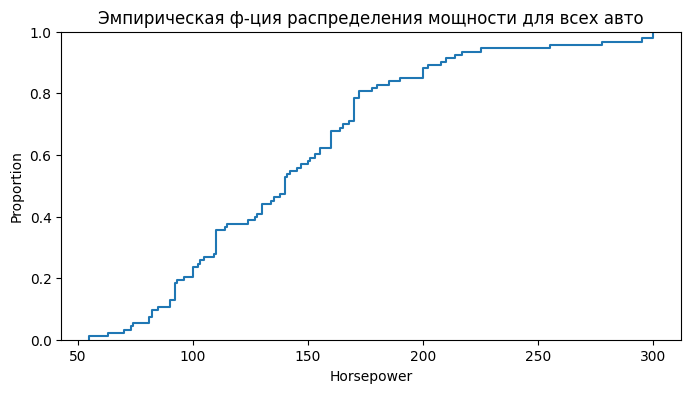

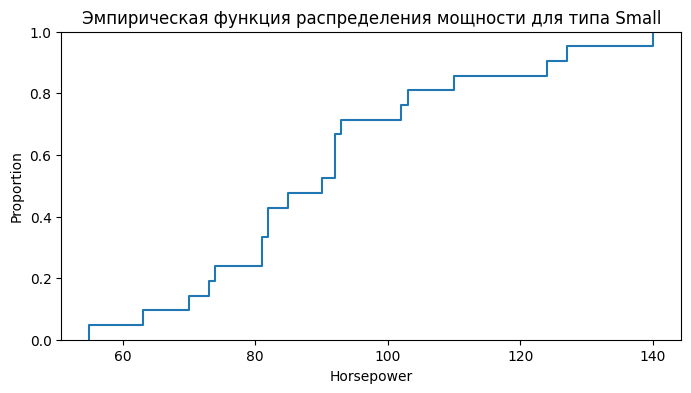

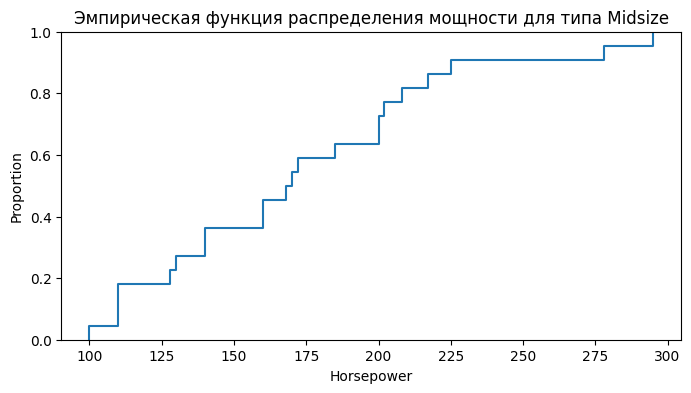

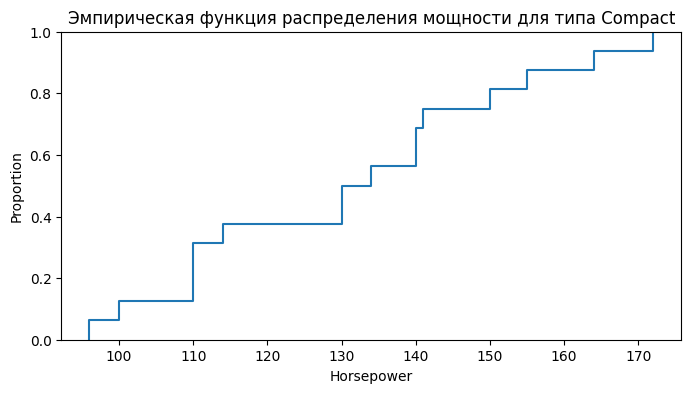

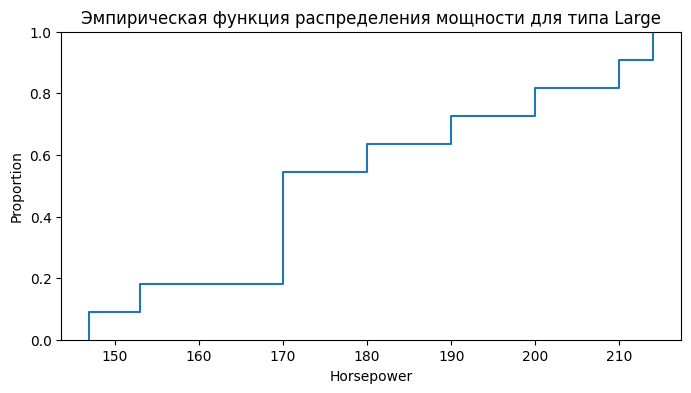

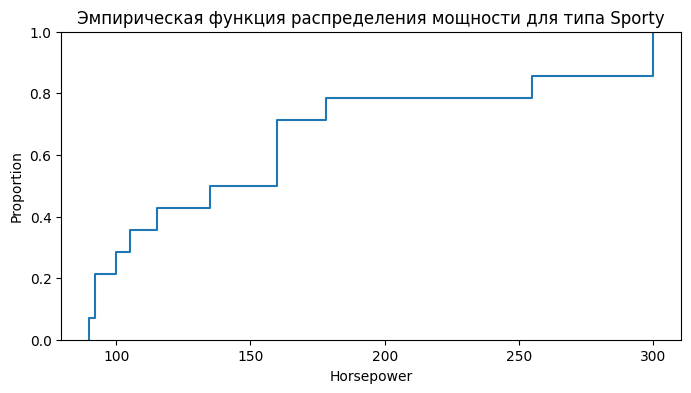

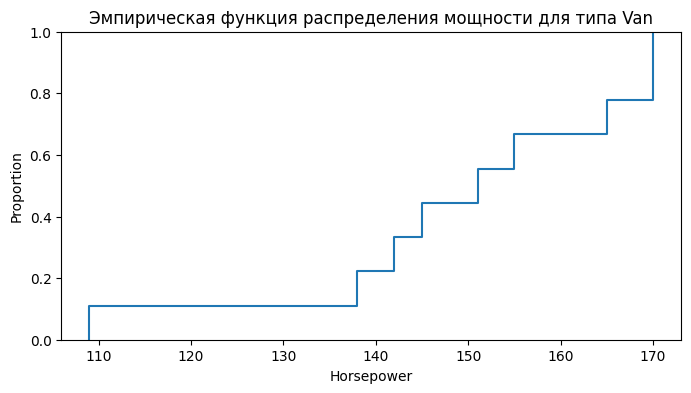

In [62]:
plt.figure(figsize=(8, 4))
sns.ecdfplot(cars['Horsepower'])
plt.title('Эмпирическая ф-ция распределения мощности для всех авто')
plt.show()

for i in unique_types: #графики эмпирической функции для всех типов авто
  plt.figure(figsize=(8, 4))
  sns.ecdfplot(cars[cars['Type'] == i]['Horsepower'])
  plt.title(f'Эмпирическая функция распределения мощности для типа {i}')
  plt.show()


Гистограмма мощности:

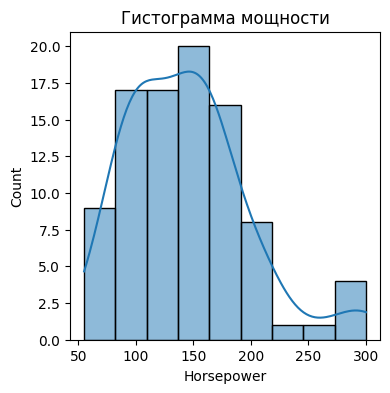

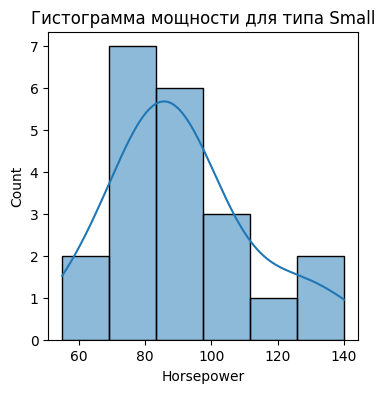

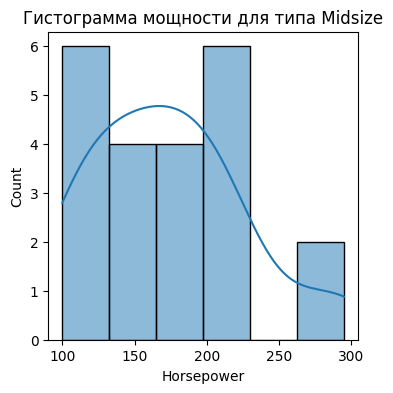

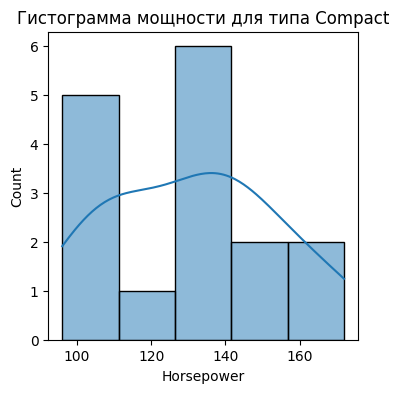

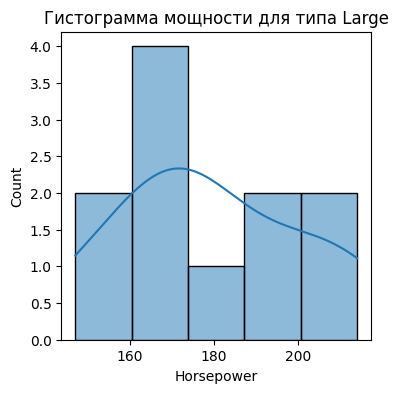

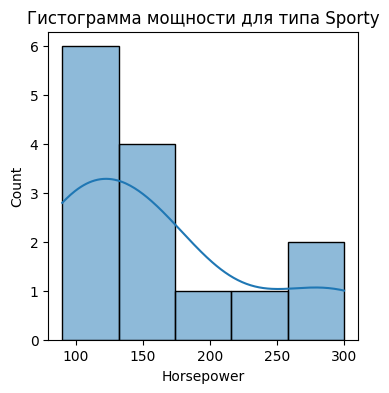

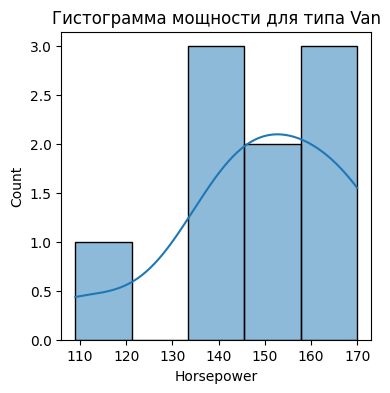

In [66]:
plt.figure(figsize=(4, 4))
sns.histplot(cars['Horsepower'], kde=True)
plt.title('Гистограмма мощности')
plt.show()

for i in unique_types:
  plt.figure(figsize=(4, 4))
  sns.histplot(cars[cars['Type'] == i]['Horsepower'], kde=True)
  plt.title(f'Гистограмма мощности для типа {i}')
  plt.show()

Boxplot мощности:

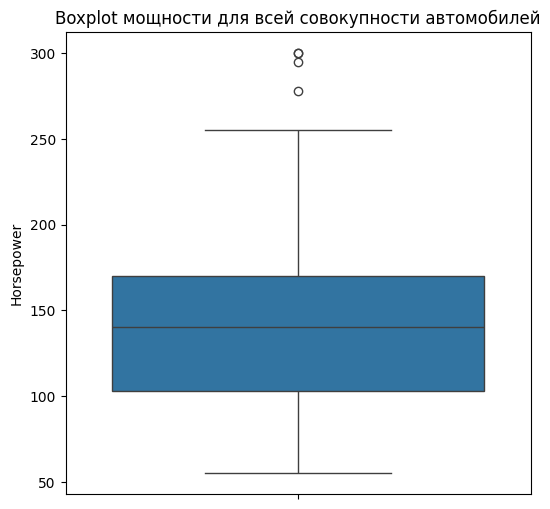

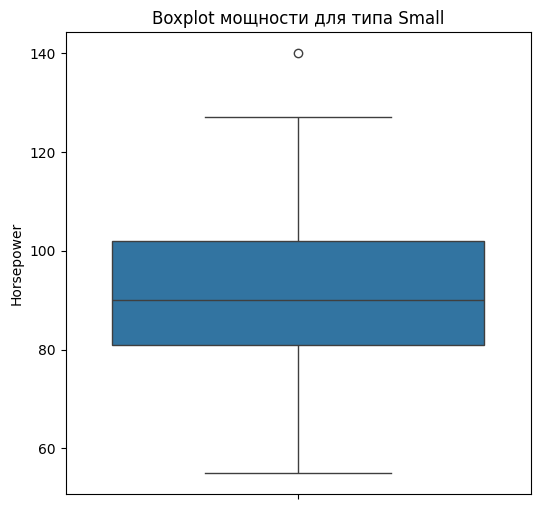

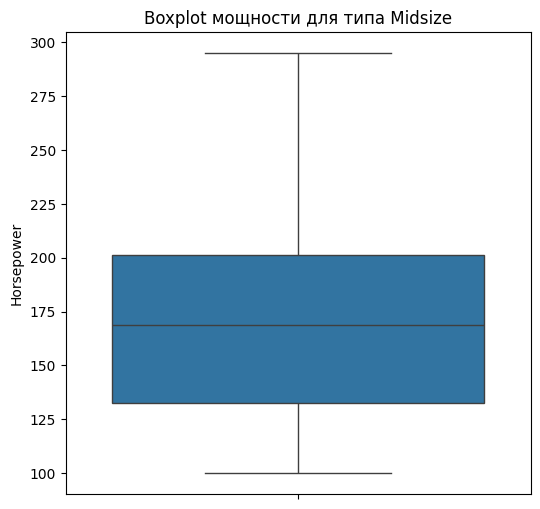

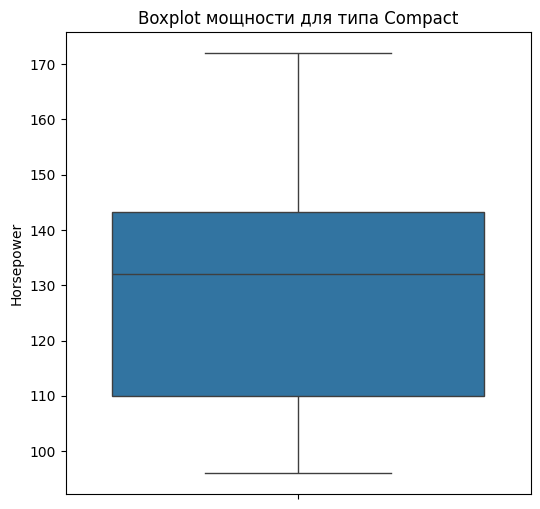

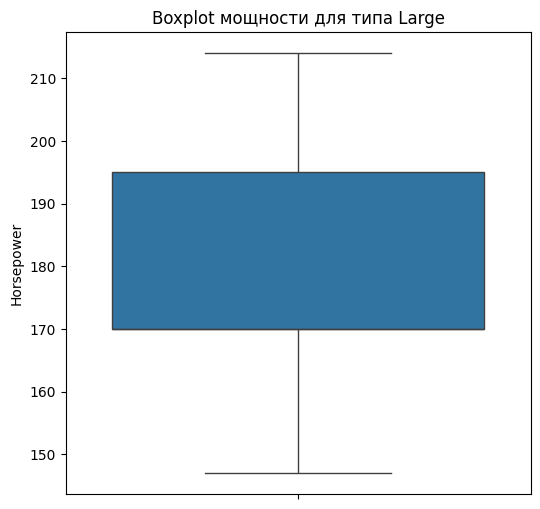

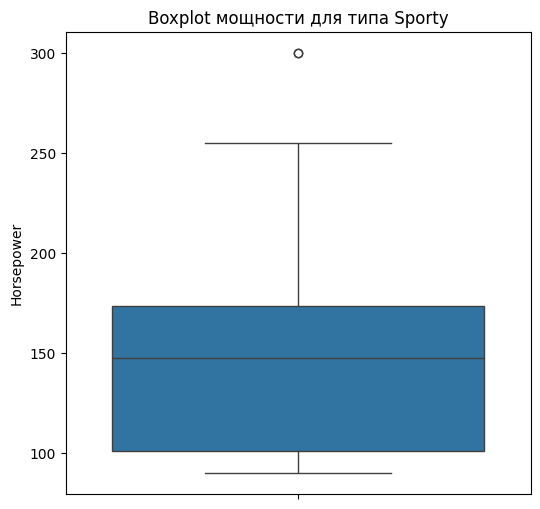

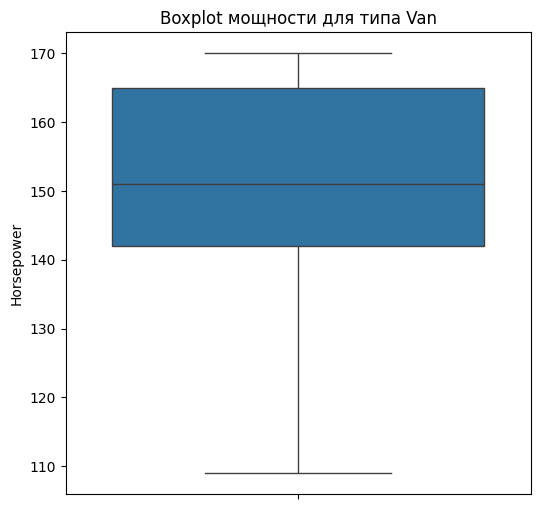

In [74]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=cars['Horsepower'])
plt.title('Boxplot мощности для всей совокупности автомобилей')
plt.show()

for i in unique_types:
  plt.figure(figsize=(6, 6))
  sns.boxplot(y=cars[cars['Type'] == i]['Horsepower'])
  plt.title(f'Boxplot мощности для типа {i}')
  plt.show()
#